In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./mydata.csv')  # Update the path accordingly
#hhel

In [2]:



# Check if 'Blood Pressure' column exists and split it
if 'Blood Pressure' in df.columns:
    # Splitting 'Blood Pressure' into 'systolic_bp' and 'diastolic_bp'
    df[['systolic_bp', 'diastolic_bp']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    # Dropping the original 'Blood Pressure' column
    df.drop('Blood Pressure', axis=1, inplace=True)

# Filling missing values in 'Sleep Disorder' with 'No Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

# Creating binary indicator for 'Accountant' in Occupation
df['Is_Accountant'] = (df['Occupation'] == 'Accountant').astype(int)

# Creating binary indicator for 'Normal' in BMI Category
df['Is_Normal_BMI'] = (df['BMI Category'] == 'Normal').astype(int)

# Ensure there are no NaN values left in key columns if necessary
df.fillna({
    'systolic_bp': df['systolic_bp'].median(),
    'diastolic_bp': df['diastolic_bp'].median(),
}, inplace=True)

# Optionally, check the structure and cleaned data
print(df.head())
print(df.info())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

   Heart Rate  Daily Steps Sleep Disorder  systolic_bp  diastolic_bp  \
0          77         4200    No Disorder        126.0          83.0   
1       

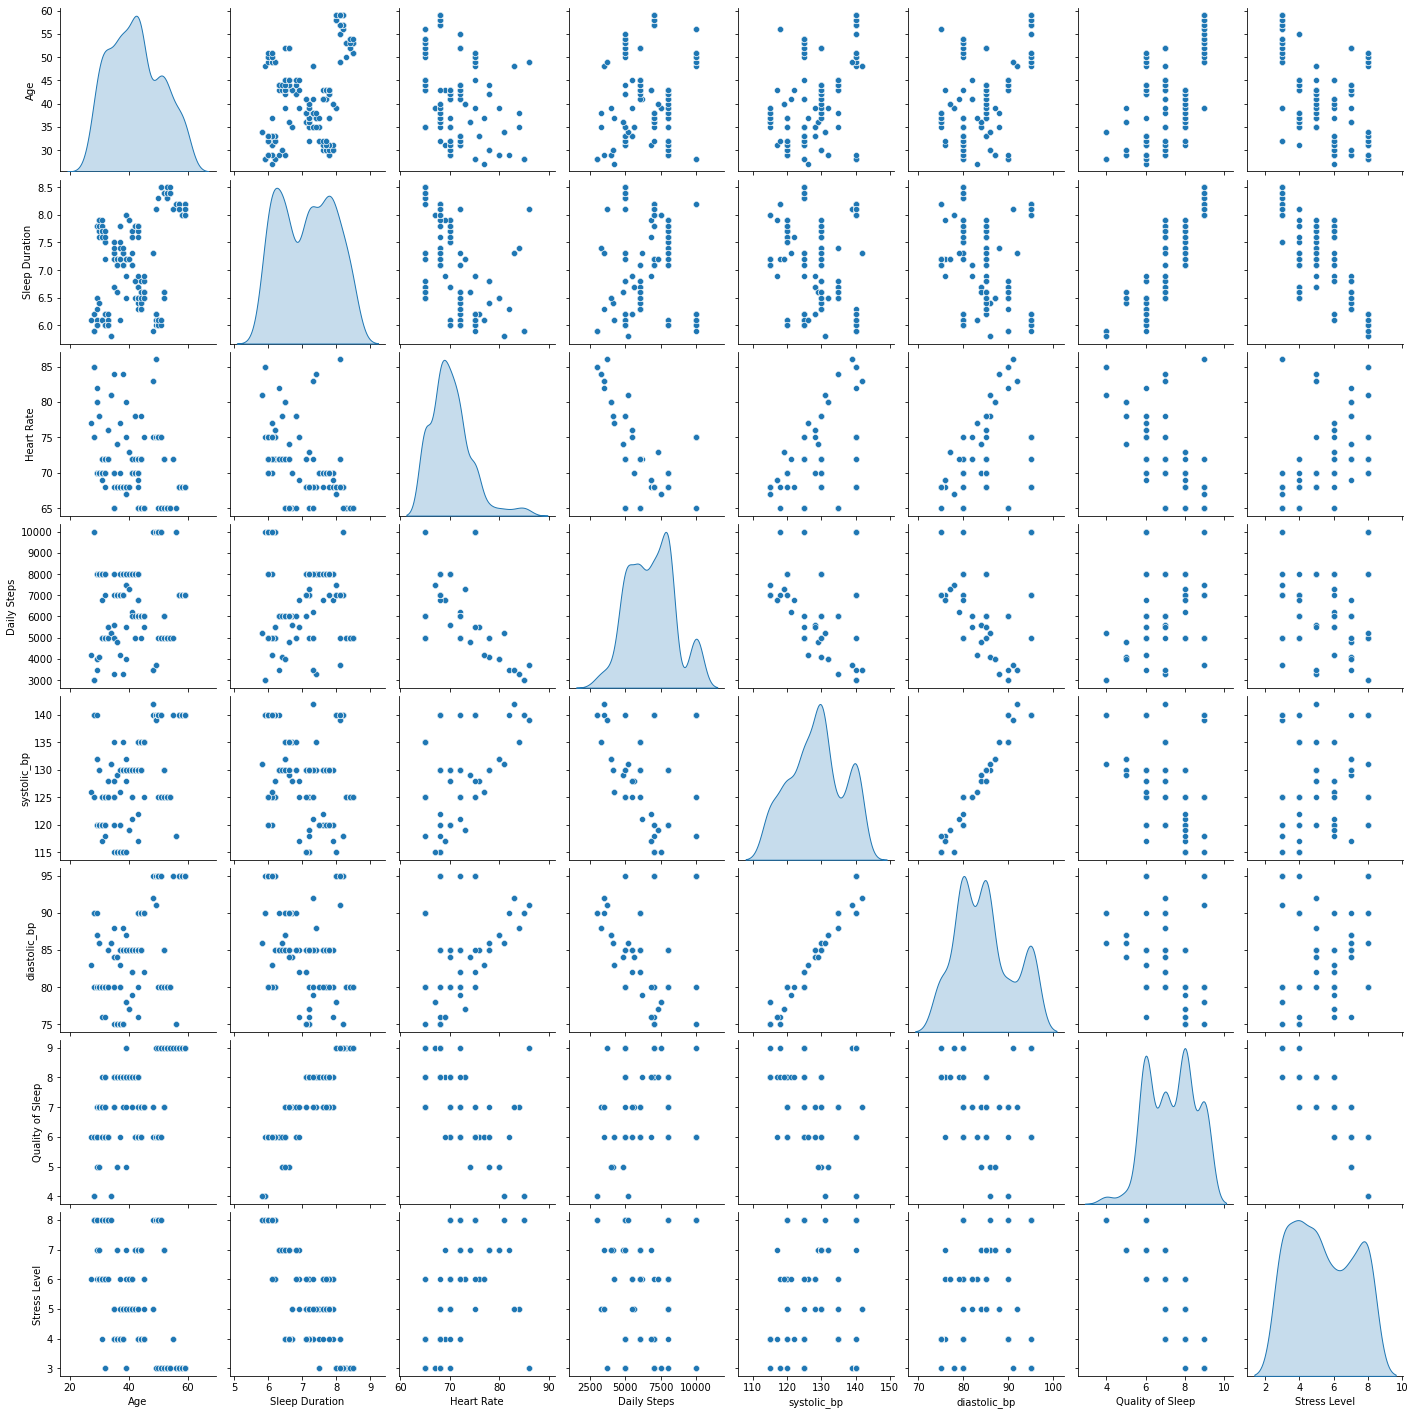

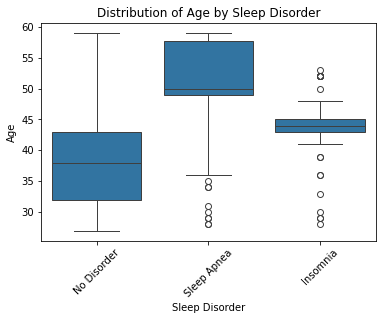

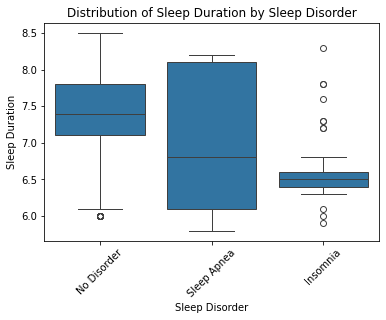

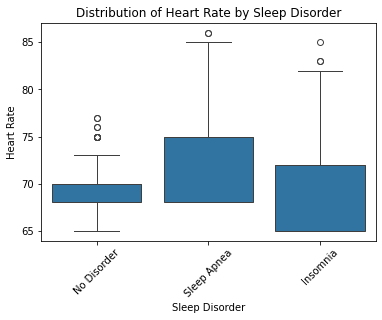

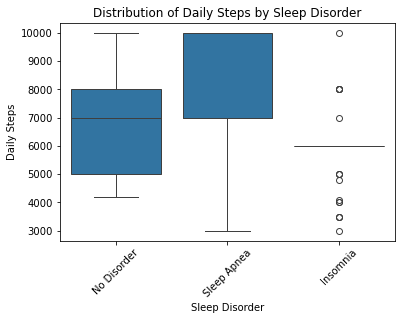

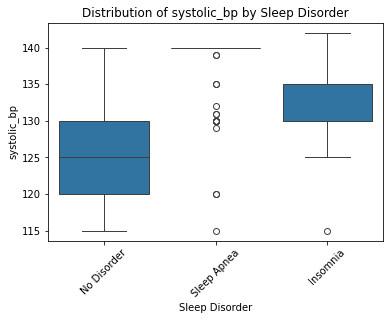

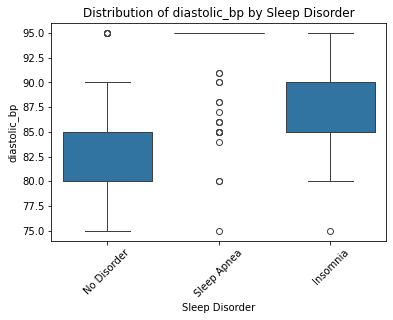

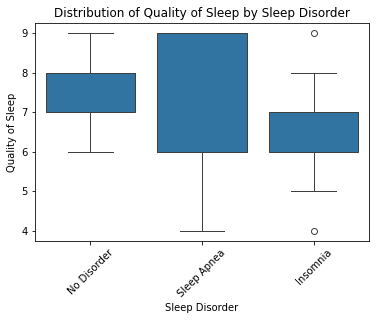

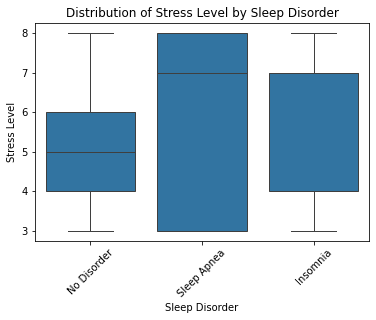

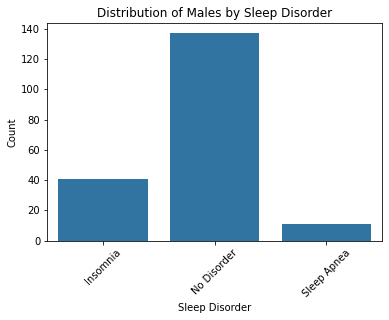

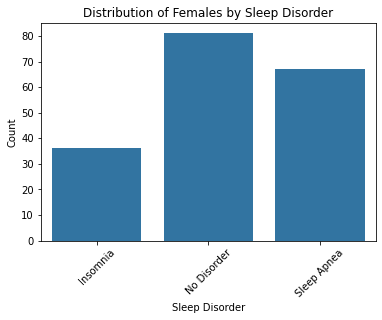

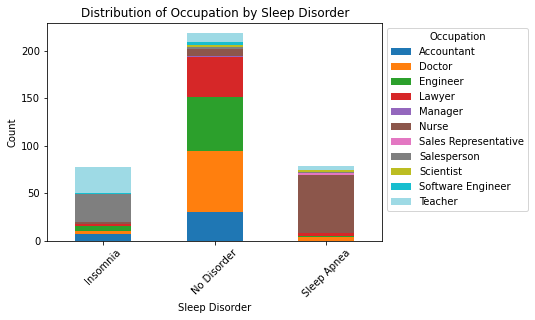

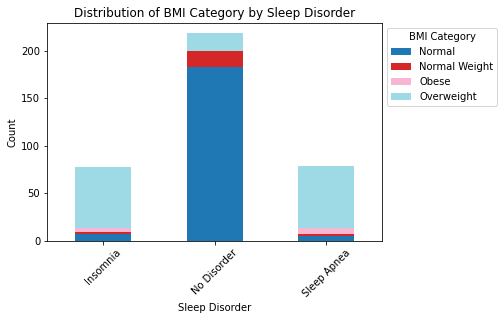

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset


# Removing 'Nonexykghk' from 'Sleep Disorder' column
df = df[df['Sleep Disorder'] != 'Nonexykghk']

# Assuming the dataset is now loaded and cleaned from previous steps

# Visualizing continuous variables with a pair plot
sns.pairplot(df[['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps', 'systolic_bp', 'diastolic_bp','Quality of Sleep','Stress Level']], diag_kind='kde')
plt.show()

# Visualizing the distribution of continuous variables across different categories of 'Sleep Disorder'
for feature in ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps', 'systolic_bp', 'diastolic_bp','Quality of Sleep','Stress Level']:
    sns.boxplot(x='Sleep Disorder', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Sleep Disorder')
    plt.xticks(rotation=45)
    plt.show()

# Assuming 'Gender' column exists and is properly formatted
if 'Gender' in df.columns:
    df['Gender_Male'] = (df['Gender'] == 'Male').astype(int)
    df['Gender_Female'] = (df['Gender'] == 'Female').astype(int)

# Visualizing distribution of 'Gender_Male' and 'Gender_Female' by Sleep Disorder
grouped_male = df.groupby('Sleep Disorder')['Gender_Male'].sum().reset_index()
grouped_female = df.groupby('Sleep Disorder')['Gender_Female'].sum().reset_index()

sns.barplot(x='Sleep Disorder', y='Gender_Male', data=grouped_male)
plt.title('Distribution of Males by Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='Sleep Disorder', y='Gender_Female', data=grouped_female)
plt.title('Distribution of Females by Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing all categories within 'Occupation' and 'BMI Category'
for feature in ['Occupation', 'BMI Category']:
    grouped = df.groupby(['Sleep Disorder', feature]).size().unstack(fill_value=0)
    ax = grouped.plot(kind='bar', stacked=True, colormap='tab20')  # Using a more distinct colormap
    plt.title(f'Distribution of {feature} by Sleep Disorder')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=feature, loc='upper left', bbox_to_anchor=(1,1))  # Moving legend outside of the plot
    plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset

# Label encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])

# 'Sleep Disorder' is the target, we will also encode it
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Splitting the 'Blood Pressure' if it hasn't been done yet
if 'Blood Pressure' in df.columns:
    bp = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    df['systolic_bp'] = bp[0]
    df['diastolic_bp'] = bp[1]
    df.drop('Blood Pressure', axis=1, inplace=True)

# Drop non-feature columns
df.drop(['Person ID'], axis=1, inplace=True)

# Ensure no NaN values are present
df.fillna(method='ffill', inplace=True)

# Separating features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8839285714285714
Confusion Matrix:
 [[20  3  2]
 [ 1 60  0]
 [ 5  2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.92      0.98      0.95        61
           2       0.90      0.73      0.81        26

    accuracy                           0.88       112
   macro avg       0.87      0.84      0.85       112
weighted avg       0.88      0.88      0.88       112



/tmp/ipykernel_3231/3732271868.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Accuracy on the full dataset: 0.9329758713136729
Training Set Accuracy: 0.9386973180076629
Test Set Accuracy: 0.8839285714285714
K-Fold Cross-validation Accuracy scores for each fold:
[0.86666667 0.88       0.84       0.97297297 0.94594595]

Mean CV Accuracy: 0.90 (+/- 0.10)


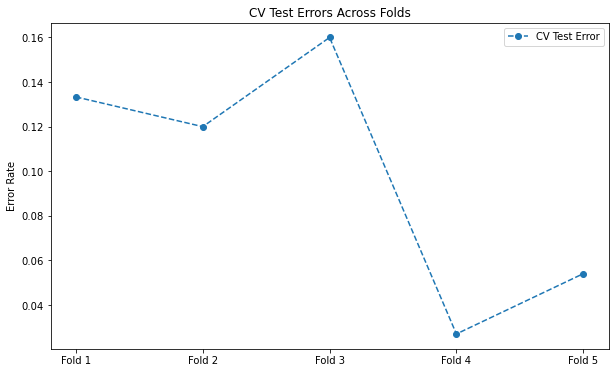

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the cleaned dataset
# df = pd.read_csv('path_to_your_data.csv')  # Uncomment and set your data path

# Separate the features and the target variable
X = df.drop('Sleep Disorder', axis=1)  # Exclude the target variable
y = df['Sleep Disorder']  # Target variable for classification

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate the model on the entire dataset before any split
random_forest_model.fit(X, y)
y_pred_full = random_forest_model.predict(X)
full_data_accuracy = accuracy_score(y, y_pred_full)
print("Accuracy on the full dataset:", full_data_accuracy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier on the training set and evaluate on the test set
random_forest_model.fit(X_train, y_train)
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest_model, X, y, cv=kf)

# Output the mean accuracy and the 95% confidence interval of the score estimate
print("K-Fold Cross-validation Accuracy scores for each fold:")
print(cv_scores)
print("\nMean CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Plotting CV test errors
plt.figure(figsize=(10, 6))
plt.plot(1 - cv_scores, label='CV Test Error', linestyle='--', marker='o')
plt.xticks(range(len(cv_scores)), ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.ylabel('Error Rate')
plt.title('CV Test Errors Across Folds')
plt.legend()
plt.show()


Accuracy on the full dataset: 0.9329758713136729
Training Set Accuracy: 0.9362416107382551
Test Set Accuracy: 0.88
K-Fold Cross-validation Accuracy scores for each fold:
[0.88       0.84       0.84       0.95945946 0.94594595]

Mean CV Accuracy: 0.89 (+/- 0.10)


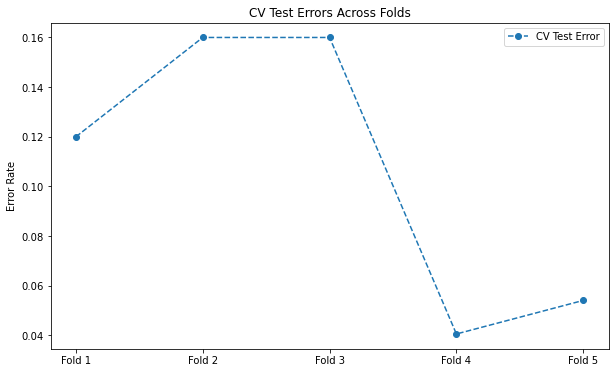

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assume df is already loaded with the appropriate data

# Separate the features and the target variable
X = df.drop('Sleep Disorder', axis=1)  # Exclude the target variable
y = df['Sleep Disorder']  # Target variable for classification

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Evaluate the model on the entire dataset before any split
decision_tree_model.fit(X, y)
y_pred_full = decision_tree_model.predict(X)
full_data_accuracy = accuracy_score(y, y_pred_full)
print("Accuracy on the full dataset:", full_data_accuracy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier on the training set and evaluate on the test set
decision_tree_model.fit(X_train, y_train)
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(decision_tree_model, X, y, cv=kf)

# Output the mean accuracy and the 95% confidence interval of the score estimate
print("K-Fold Cross-validation Accuracy scores for each fold:")
print(cv_scores)
print("\nMean CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Plotting CV test errors
plt.figure(figsize=(10, 6))
plt.plot(1 - cv_scores, label='CV Test Error', linestyle='--', marker='o')
plt.xticks(range(len(cv_scores)), ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.ylabel('Error Rate')
plt.title('CV Test Errors Across Folds')
plt.legend()
plt.show()


Unique values in Gender column before encoding: [1 0]
Unique values in Gender column after encoding: [1 0]


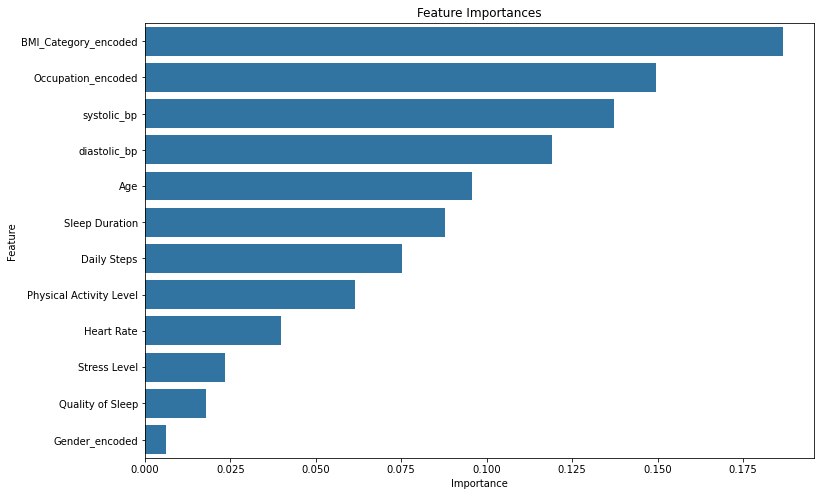

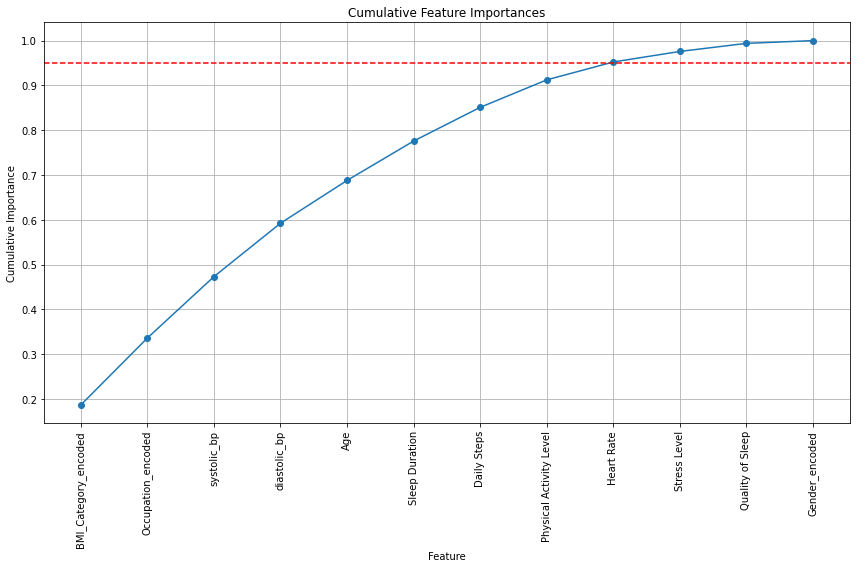

In [15]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Assuming df is your DataFrame loaded with the data

# Display unique values before encoding
print("Unique values in Gender column before encoding:", df['Gender'].unique())

# Label encode categorical variables
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Occupation_encoded'] = label_encoder.fit_transform(df['Occupation'])
df['BMI_Category_encoded'] = label_encoder.fit_transform(df['BMI Category'])

# Display unique values after encoding
print("Unique values in Gender column after encoding:", df['Gender_encoded'].unique())

# Sleep Disorder is the target variable, encode it as well
df['Sleep_Disorder_encoded'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Prepare the data for the model
X = df[['Gender_encoded', 'Occupation_encoded', 'BMI_Category_encoded',
        'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
        'Heart Rate', 'Daily Steps', 'systolic_bp', 'diastolic_bp','Quality of Sleep']]  
y = df['Sleep_Disorder_encoded']

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Match feature importances with the column names
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the dataframe by importance
features_sorted = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_sorted)
plt.title('Feature Importances')
plt.show()

# Calculate cumulative sum of feature importances
features_sorted['cumulative'] = features_sorted['Importance'].cumsum()

# Convert to numpy arrays for plotting
feature_names = np.array(features_sorted['Feature'])
cumulative_importance = np.array(features_sorted['cumulative'])

# Plot cumulative feature importances with feature names on the x-axis
plt.figure(figsize=(12, 8))
plt.plot(feature_names, cumulative_importance, marker='o')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()


Epoch 1/100


/home/amin/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2937 - loss: 1.1540 - val_accuracy: 0.7358 - val_loss: 0.8636
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 0.8020 - val_accuracy: 0.9057 - val_loss: 0.6231
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8934 - loss: 0.6273 - val_accuracy: 0.9057 - val_loss: 0.4517
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9005 - loss: 0.4806 - val_accuracy: 0.9245 - val_loss: 0.3354
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.3910 - val_accuracy: 0.9245 - val_loss: 0.2587
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.3336 - val_accuracy: 0.9623 - val_loss: 0.2042
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8992 - loss: 0.3164 - val_accuracy: 0.9623 - val_loss: 0.1689
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9231 - loss: 0.2447 - val_accuracy: 0.9623 - val_loss: 0.1421
Epoch 9/100

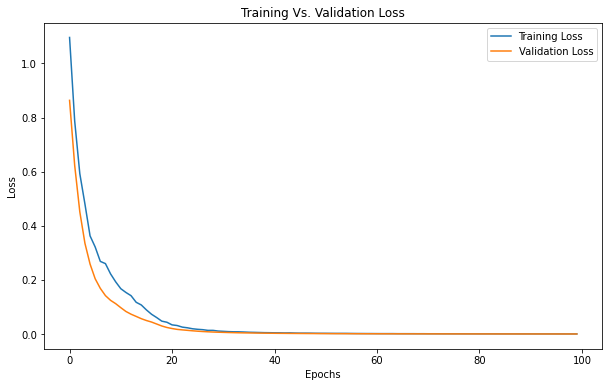

Index(['Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'systolic_bp',
       'diastolic_bp', 'Occupation_encoded', 'Sleep_Disorder_encoded'],
      dtype='object')


In [57]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Input

# # Neural network architecture


# # Load the dataset
# # Assuming df is your DataFrame loaded with the data

# # Exclude specified columns
# X = df.drop(['Sleep Disorder', 'Quality of Sleep', 'Gender', 'Stress Level'], axis=1)
# y = df['Sleep Disorder']

# # Encode categorical data
# label_encoder = LabelEncoder()
# for col in ['Occupation', 'BMI Category']:  # Add other categorical columns if necessary
#     X[col] = label_encoder.fit_transform(X[col])

# # Scaling features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Encode the target variable
# y_encoded = label_encoder.fit_transform(y)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# # Neural network architecture
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(len(np.unique(y_encoded)), activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Set early stopping monitor so the model stops training when it won't improve anymore
# early_stopping_monitor = EarlyStopping(patience=3)

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {accuracy}')

# # Plotting training and validation loss over epochs
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training Vs. Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()
# print(X.columns)  # This will show the columns being used as inputs to the model


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4127 - loss: 1.0759 - val_accuracy: 0.8000 - val_loss: 0.8451
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7880 - loss: 0.7760 - val_accuracy: 0.9500 - val_loss: 0.6002
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8395 - loss: 0.5913 - val_accuracy: 0.9500 - val_loss: 0.4513
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8456 - loss: 0.5287 - val_accuracy: 0.9500 - val_loss: 0.3590
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8800 - loss: 0.4129 - val_accuracy: 0.9750 - val_loss: 0.2979
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8928 - loss: 0.3892 - val_accuracy: 0.9750 - val_loss: 0.2644
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.4216 - val_accuracy: 0.9750 - val_loss: 0.2488
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8487 - loss: 0.4369 - val_accuracy: 0.9750 - val_loss: 0.2399

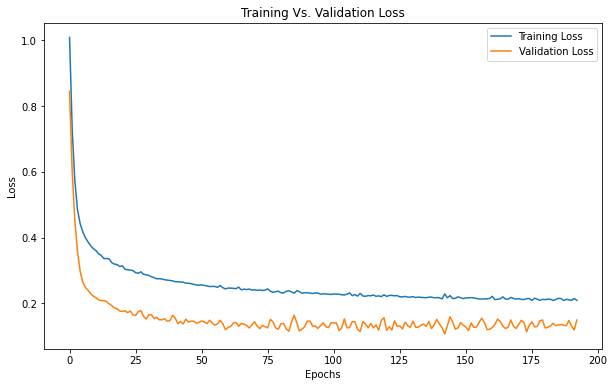

Columns used for model training: ['Age', 'Occupation_encoded', 'Sleep Duration', 'Physical Activity Level', 'BMI_Category_encoded', 'Heart Rate', 'systolic_bp', 'diastolic_bp']


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
# Assuming df is your DataFrame loaded with the data

# Encode categorical data
label_encoder = LabelEncoder()
df['Occupation_encoded'] = label_encoder.fit_transform(df['Occupation'])
df['BMI_Category_encoded'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep_Disorder_encoded'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Exclude specified columns and use encoded versions
X = df[['Age', 'Occupation_encoded', 'Sleep Duration', 'Physical Activity Level',
        'BMI_Category_encoded', 'Heart Rate', 'systolic_bp', 'diastolic_bp']]  # Removed 'Daily Steps', 'Gender', 'Stress Level'
y = df['Sleep_Disorder_encoded']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Neural network architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly here
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=50)

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.15, callbacks=[early_stopping_monitor], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Verify columns used
print("Columns used for model training:", X.columns.tolist())
